In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg 
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from matplotlib import rcParams
from cycler import cycler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from matplotlib.pyplot import figure

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/My Drive/AIRGAS/Superstore3.csv')

In [4]:
df = df.drop("Unnamed: 0" , axis = 1)
df = df.drop('Row_ID', axis = 1)
df = df.drop("Ship_Date", axis =1)

In [ ]:
df.set_index('Order_Date')

In [8]:
test_size = 1998

df_train = df[:-test_size]
df_test = df[-test_size:]

In [6]:
def create_features(df, label=None):
    df['Product_ID'] = df.index
    df['Month'] = df.Month
    df['Day'] = df.Day
    df['Year'] = df.Year
    df['Region'] = df.Region
    df['Ship_Mode'] = df.Ship_Mode
    df['Segment'] = df.Segment
    df['Country'] = df.Country
    df['City'] = df.City
    df['State'] = df.State
    df['Sales'] = df.Sales
    df['Profit'] = df.Profit
    df['Customer_ID'] = df.Customer_ID

    X = df[['Day','Month','Year', 'Sales', 'Profit', 'Region', 'Ship_Mode', 'Segment', 'Country', 'City', 'State', 'Customer_ID']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
X_train, y_train = create_features(df_train, label='Sales')
X_test, y_test = create_features(df_test, label='Sales')

In [11]:
dtrain = xg.DMatrix(X_train, label=y_train)
dtest = xg.DMatrix(X_test, label=y_test)

In [13]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:squarederror',
    'n_estimators':150,
    'reg_lambda':1,
    'gamma':.1
}

In [14]:
params['eval_metric'] = "rmse"

In [15]:
num_boost_round = 999

In [ ]:
reg = xg.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Sales")],
    early_stopping_rounds=50
)

In [18]:
df_test['Sales_Prediction'] = reg.predict(dtest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
results = df_test

In [24]:
print("Mean Squared Error:",mean_squared_error(df_test.Sales_Prediction, df_test.Sales))

Mean Squared Error: 308.48878263454486


In [25]:
print("Mean Absolute Error:",mean_absolute_error(df_test.Sales_Prediction, df_test.Sales))

Mean Absolute Error: 2.0371725222760846


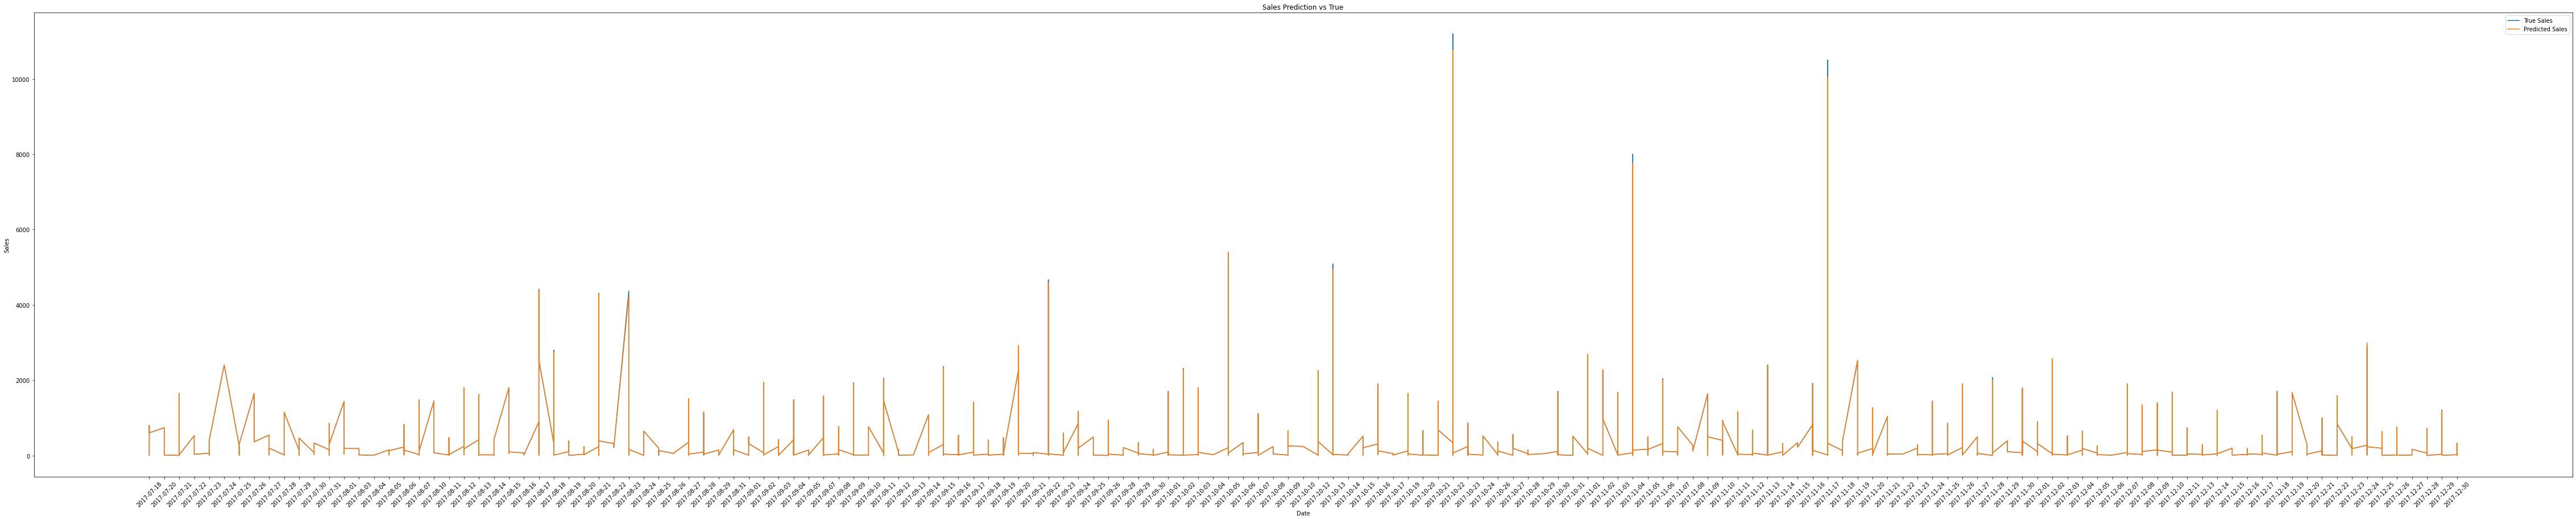

In [54]:
plt.figure(figsize=(80, 15))
plt.plot(results.Order_Date, results.Sales, label = "True Sales")
plt.plot(results.Order_Date, results.Sales_Prediction, label = "Predicted Sales")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Prediction vs True')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [55]:
results

,Order_ID,Order_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Day,Month,Year,Sales_Prediction
7996,4431,2017-07-18,3,691,655,0,0,306,30,19134,...,7,1773,9.184,2,0.2,1.1480,18,7,2017,9.203498
7997,4345,2017-07-18,3,469,437,0,0,307,1,85023,...,12,1645,311.976,3,0.2,-42.8967,18,7,2017,312.321198
7998,4431,2017-07-18,3,691,655,0,0,306,30,19134,...,12,503,198.744,4,0.3,-14.1960,18,7,2017,197.994720
7999,4345,2017-07-18,3,469,437,0,0,307,1,85023,...,8,1211,801.600,5,0.5,-448.8960,18,7,2017,796.394287
8000,4345,2017-07-18,3,469,437,0,0,307,1,85023,...,12,1576,161.568,2,0.2,10.0980,18,7,2017,161.452362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,3255,2017-12-30,3,326,302,0,0,188,34,80538,...,15,1055,3.024,3,0.2,-0.6048,30,12,2017,3.012477
9990,2961,2017-12-30,3,561,544,0,0,256,24,10009,...,10,712,52.776,3,0.2,19.7910,30,12,2017,52.432110
9991,2961,2017-12-30,3,561,544,0,0,256,24,10009,...,5,1553,90.930,7,0.0,2.7279,30,12,2017,91.296944
9992,2332,2017-12-30,3,170,183,1,0,54,23,94533,...,10,1200,13.904,2,0.2,4.5188,30,12,2017,13.849577


In [65]:
hold = pd.read_csv("drive/My Drive/AIRGAS/Superstore2.csv")

In [66]:
hold = hold.tail(1998)

In [ ]:
df['Region'] = lbl.fit_transform(df['Region'].astype(str))
df['Product_ID'] = lbl.fit_transform(df['Product_ID'].astype(str))
df['Ship_Mode'] = lbl.fit_transform(df['Ship_Mode'].astype(str))
df['Customer_ID'] = lbl.fit_transform(df['Customer_ID'].astype(str))
df['Segment'] = lbl.fit_transform(df['Segment'].astype(str))
df['Country'] = lbl.fit_transform(df['Country'].astype(str))
df['City'] = lbl.fit_transform(df['City'].astype(str))
df['State'] = lbl.fit_transform(df['State'].astype(str))
df['Order_ID'] = lbl.fit_transform(df['Order_ID'].astype(str))
df['Customer_Name'] = lbl.fit_transform(df['Customer_Name'].astype(str))
df['Category'] = lbl.fit_transform(df['Category'].astype(str))
df['Sub-Category'] = lbl.fit_transform(df['Sub-Category'].astype(str))
df['Product_Name'] = lbl.fit_transform(df['Product_Name'].astype(str))

In [85]:
results['Ship_Mode'] = hold['Ship Mode']
results['Customer_ID'] = hold['Customer ID']
results['Customer_Name'] = hold['Customer Name']
results['Segment'] = hold['Segment']
results['Country'] = hold['Country']
results['City'] = hold['City']
results['State'] = hold['State']
results['Region'] = hold['Region']
results['Product_ID'] = hold['Product ID']
results['Order_ID'] = hold['Order ID']
results['Category'] = hold['Category']
results['Sub-Category'] = hold['Sub-Category']
results['Product_Name'] = hold['Product Name']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [88]:
results.set_index('Product_Name')

,Order_ID,Order_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,...,Category,Sub-Category,Sales,Quantity,Discount,Profit,Day,Month,Year,Sales_Prediction
Product_Name,,,,,,,,,,,,,,,,,,,,,
Microsoft Sculpt Comfort Mouse,US-2017-105998,2017-07-18,First Class,CR-12580,Clay Rozendal,Home Office,United States,San Diego,California,19134,...,Technology,Accessories,9.184,2,0.2,1.1480,18,7,2017,9.203498
Chromcraft Round Conference Tables,US-2017-105998,2017-07-18,First Class,CR-12580,Clay Rozendal,Home Office,United States,San Diego,California,85023,...,Furniture,Tables,311.976,3,0.2,-42.8967,18,7,2017,312.321198
"Eldon Regeneration Recycled Desk Accessories, Smoke",US-2014-148194,2017-07-18,First Class,BS-11365,Bill Shonely,Corporate,United States,Seattle,Washington,19134,...,Furniture,Furnishings,198.744,4,0.3,-14.1960,18,7,2017,197.994720
Holmes Odor Grabber,US-2014-148194,2017-07-18,First Class,BS-11365,Bill Shonely,Corporate,United States,Seattle,Washington,85023,...,Office Supplies,Appliances,801.600,5,0.5,-448.8960,18,7,2017,796.394287
Cisco SPA508G,US-2015-151407,2017-07-18,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Dubuque,Iowa,85023,...,Technology,Phones,161.568,2,0.2,10.0980,18,7,2017,161.452362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ultra Door Pull Handle,CA-2014-110422,2017-12-30,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,80538,...,Furniture,Furnishings,3.024,3,0.2,-0.6048,30,12,2017,3.012477
Tenex B1-RE Series Chair Mats for Low Pile Carpets,CA-2017-121258,2017-12-30,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,10009,...,Furniture,Furnishings,52.776,3,0.2,19.7910,30,12,2017,52.432110
Aastra 57i VoIP phone,CA-2017-121258,2017-12-30,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,10009,...,Technology,Phones,90.930,7,0.0,2.7279,30,12,2017,91.296944
